/tmp/ipython-input-1749144192.py:6: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  modelX_df = pd.read_csv('Dementia Prediction Dataset.csv')


Original forbidden list size: 971 | New list size: 905

 STEP 3: CLEANING DATA (Optimized) 
Original shape: (84590, 1024)
Shape after dropping forbidden columns: (84590, 153)

 STEP 4: FEATURE ENGINEERING (Optimized) 
Shape after Feature Engineering: (84590, 170)
Replaced 9 special codes with np.nan.
Imputed 65 columns with ZERO (Missing = 'No'/'Never').
Checking 28 columns for MEDIAN imputation...
Missing values found:
 NACCAGE      1314
TELCOV      79422
NACCAGEB      635
NACCYOD     62138
NACCPAFF        1
EDUC         1882
NACCNIHR     1900
NACCDIED        1
NACCDSMO    64331
NACCDSDY    62087
NACCNRMO    84308
NACCNURP        1
TELMOD      79422
NACCDAD      4110
NACCNRDY    84244
NACCNOVS     1468
NACCFAM      8830
NACCMOD     65656
ARTLOEX     62126
NACCMOM      2935
NACCMDSS        1
NCOTHR      44921
NPTAUHAP    84362
NACCDSYR    60642
AGE          1418
ARTSPIN     62126
NACCACTV        1
NACCNRYR    84211
dtype: int64
Median imputation complete.
X_final shape: (84589, 170)
y_

/tmp/ipython-input-1749144192.py:341: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


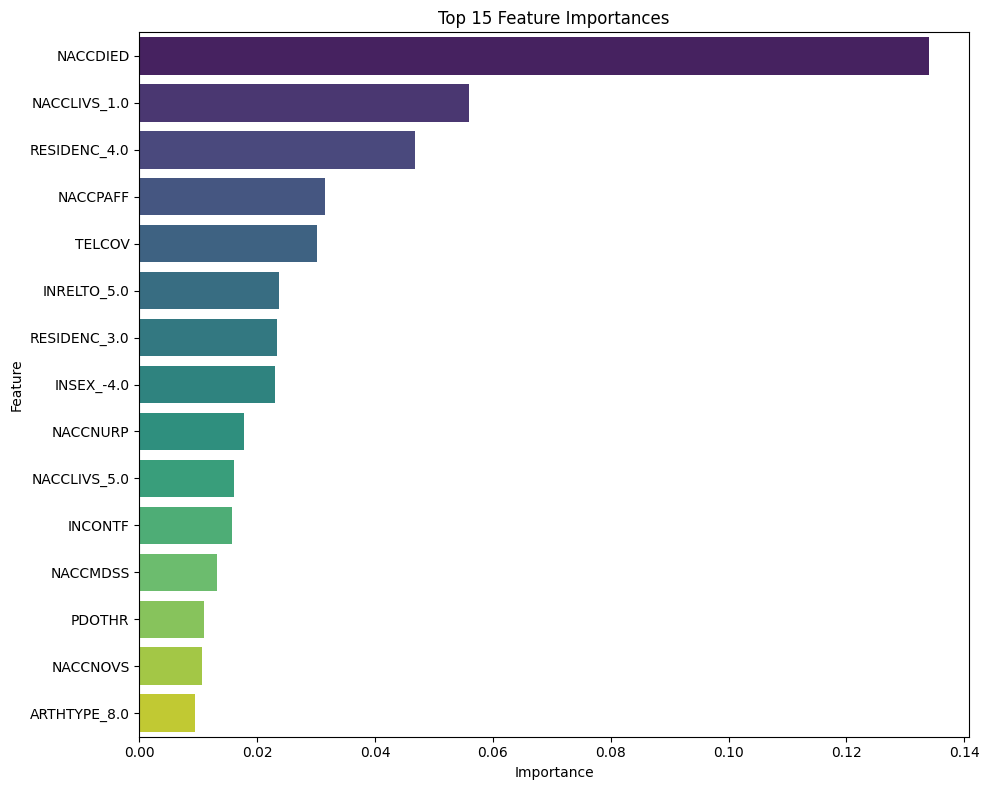

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
modelX_df = pd.read_csv('Dementia Prediction Dataset.csv')
original_df = modelX_df

allowed_diagnoses = [
    'CVHATT', 'HATTMULT', 'HATTYEAR', 'CVAFIB', 'CVANGIO', 'CVBYPASS', 'CVPACDEF', 'CVPACE',
    'CVCHF', 'CVANGINA', 'CVHVALVE', 'CVOTHR', 'CVOTHRX', 'CBSTROKE', 'STROKMUL', 'NACCSTYR',
    'CBTIA', 'TIAMULT', 'NACCTIYR', 'PD', 'PDYR', 'PDOTHR', 'PDOTHRYR', 'SEIZURES',
    'TBI', 'TBIBRIEF', 'TRAUMBRF', 'TBIEXTEN', 'TRAUMEXT', 'TBIWOLOS', 'TRAUMCHR', 'NACCTBI', 'TBIYEAR',
    'DIABETES', 'DIABTYPE', 'HYPERTEN', 'HYPERCHO', 'B12DEF', 'THYROID',
    'ARTHRIT', 'ARTHTYPE', 'ARTHTYPX', 'ARTHUPEX', 'ARTHLOEX', 'ARTHSPIN', 'ARTHUNK',
    'INCONTU', 'INCONTF', 'APNEA', 'RBD', 'INSOMN', 'OTHSLEEP', 'OTHSLEEX',
    'ALCOHOL', 'ABUSOTHR', 'ABUSX', 'PTSD', 'BIPOLAR', 'SCHIZ', 'DEP2YRS', 'DEPOTHR',
    'ANXIETY', 'OCD', 'PSYCDIS', 'PSYCDISX', 'NCOTHR', 'NCOTHRX'
]

forbidden_medical_variables = [
    'NPSYDEV', 'NPIQINF', 'NPIQINFX', 'NPFORMVER', 'NPSEX', 'NPPMIH', 'NPFIX', 'NPFIXX', 'NPWBRWT',
    'NPWBRF', 'NPGRCCA', 'NPGRLA', 'NPGRHA', 'NPGRSNH', 'NPGRLCH', 'NPTAN', 'NPTANX', 'NPABAN',
    'NPABANX', 'NPASAN', 'NPASANX', 'NPTDPAN', 'NPTDPANX', 'NPHISMB', 'NPHISG', 'NPHISSS',
    'NPHIST', 'NPHISO', 'NPHISOX', 'NPTHAL', 'NPADNC', 'NPLINF', 'NPLAC', 'NPINF', 'NPINF1A',
    'NPINF1B', 'NPINF1D', 'NPINF1F', 'NPINF2A', 'NPINF2B', 'NPINF2D', 'NPINF2F', 'NPINF3A',
    'NPINF3B', 'NPINF3D', 'NPINF3F', 'NPINF4A', 'NPINF4B', 'NPINF4D', 'NPINF4F', 'NPHEM',
    'NPHEMO', 'NPHEMO1', 'NPHEMO2', 'NPHEMO3', 'NPMICRO', 'NPOLD', 'NPOLD1', 'NPOLD2', 'NPOLD3',
    'NPOLD4', 'NPOLDD', 'NPOLDD1', 'NPOLDD2', 'NPOLDD3', 'NPOLDD4', 'NPWMR', 'NPPATH', 'NPPATH2',
    'NPPATH3', 'NPPATH4', 'NPPATH5', 'NPPATH6', 'NPPATH7', 'NPPATH8', 'NPPATH9', 'NPPATH10',
    'NPPATH11', 'NPPATHO', 'NPPATHOX', 'NPART', 'NPOANG', 'NPLBOD', 'NPNLOSS', 'NPHIPSCL', 'NPSCL',
    'NPFTDTAU', 'NPFTDT2', 'NPFTDT5', 'NPFTDT6', 'NPFTDT7', 'NPFTDT8', 'NPFTDT9', 'NPFTDT10',
    'NPFRONT', 'NPTAU', 'NPFTD', 'NPFTDTDP', 'NPALSMND', 'NPOFTD', 'NPOFTD1', 'NPOFTD2', 'NPOFTD3',
    'NPOFTD4', 'NPOFTD5', 'NPFTDNO', 'NPFTDSPC', 'NPTDPA', 'NPTDPB', 'NPTDPC', 'NPTDPD', 'NPTDPE',
    'NPPDXA', 'NPPDXB', 'NPPDXD', 'NPPDXE', 'NPPDXF', 'NPPDXG', 'NPPDXH', 'NPPDXI', 'NPPDXJ',
    'NPPDXK', 'NPPDXL', 'NPPDXM', 'NPPDXN', 'NPPDXP', 'NPPDXQ', 'NPBNKB', 'NPBNKF', 'NPFAUT',
    'NPFAUT1', 'NPFAUT2', 'NPFAUT3', 'NPFAUT4', 'NPNIT', 'NPCERAD', 'NPADRDA', 'NPOCRIT', 'NPVOTH',
    'NPLEWYCS', 'NPGENE', 'NPFHSPEC', 'NPTAUHap', 'NPPRNP', 'NPCHROM', 'NPPNORM', 'NPCNORM',
    'NPPADP', 'NPCADP', 'NPPAD', 'NPCAD', 'NPPLEWY', 'NPCLEWY', 'NPPVASC', 'NPCVASC', 'NPPFTLD',
    'NPCFTLD', 'NPPHIPP', 'NPCHIPP', 'NPPPRION', 'NPCPRION', 'NPPOTH1', 'NPCOTH1', 'NPOTH1X',
    'NPPOTH2', 'NPCOTH2', 'NPOTH2X', 'NPPOTH3', 'NPCOTH3', 'NPOTH3X', 'NPARTAG', 'NPATGSEV',
    'NPATGAMY', 'NPATGAM1', 'NPATGAM2', 'NPATGAM3', 'NPATGAM4', 'NPATGAM5', 'NPATGFRN', 'NPATGFR1',
    'NPATGFR2', 'NPATGFR3', 'NPATGFR4',
    'WHODIDDX', 'DXMETHOD', 'NORMCOG', 'DEMENTED', 'NACCUDSD', 'AMNDEM', 'PCA', 'NACCPPA',
    'NACCPPAG', 'NACCPPME', 'NACCBVFT', 'NACCLBDS', 'NAMNDEM', 'NACCTMCI', 'NACCMCIL',
    'NACCMCIA', 'NACCMCIE', 'NACCMCIV', 'IMPNOMCI', 'AMYLPET', 'AMYLCSF', 'FDGAD',
    'HIPPATR', 'TAUPETAD', 'CSFTAU', 'FDGFTLD', 'TPETFTLD', 'MRFTLD', 'DATSCAN',
    'OTHBIOM', 'OTHBIOMX', 'IMAGLINF', 'IMAGLAC', 'IMAGMACH', 'IMAGMICH', 'IMAGMWMH',
    'IMAGEWMH', 'OTHMUT', 'OTHMUTX', 'NACCALZD', 'NACCALZP', 'PROBAD', 'PROBADIF',
    'POSSAD', 'POSSADIF', 'NACCLBDE', 'NACCLBDP', 'PARK', 'MSA', 'MSAIF', 'PSP',
    'PSPIF', 'CORT', 'CORTIF', 'FTLDMO', 'FTLDMOIF', 'FTLDNOS', 'FTLDNOIF', 'FTD',
    'FTDIF', 'PPAPH', 'PPAPHIF', 'FTLDSUBT', 'FTLDSUBX', 'CVD', 'CVDIF', 'PREVSTK',
    'STROKDEC', 'STKIMAG', 'INFNETW', 'INFWMH', 'VASC', 'VASCIF', 'VASCPS', 'VASCPSIF',
    'STROKE', 'STROKIF', 'ESSTREM', 'ESSTREIF', 'DOWNS', 'DOWNSIF', 'HUNT', 'HUNTIF',
    'PRION', 'PRIONIF', 'BRNINJ', 'BRNINJIF', 'BRNINCTE', 'HYCEPH', 'HYCEPHIF', 'EPILEP',
    'EPILEPIF', 'NEOP', 'NEOPIF', 'NEOPSTAT', 'HIV', 'HIVIF', 'OTHCOG', 'OTHCOGIF',
    'OTHCOGX', 'DEP', 'DEPIF', 'DEPTREAT', 'BIPOLDX', 'BIPOLDIF', 'SCHIZOP', 'SCHIZOIF',
    'ANXIET', 'ANXIETIF', 'DELIR', 'DELIRIF', 'PTSDDX', 'PTSDDXIF', 'OTHPSY', 'OTHPSYIF',
    'OTHPSYX', 'ALCDEM', 'ALCDEMIF', 'ALCABUSE', 'IMPSUB', 'IMPSUBIF', 'DYSILL', 'DYSILLIF',
    'MEDS', 'MEDSIF', 'DEMUN', 'DEMUNIF', 'COGOTH', 'COGOTHIF', 'COGOTHX', 'COGOTH2',
    'COGOTH2F', 'COGOTH2X', 'COGOTH3', 'COGOTH3F', 'COGOTH3X', 'NACCNORM', 'NACCIDEM',
    'NACCMCII', 'NACCADMU', 'NACCFTDM', 'NACCETPR', 'CANCER', 'CANCSITE', 'DIABET',
    'MYOINF', 'CONGHRT', 'AFIBRILL', 'HYPERT', 'ANGINA', 'HYPCHOL', 'VB12DEF', 'THYDIS',
    'ARTH', 'ARTYPE', 'ARTYPEX', 'ARTUPEX', 'ARTHLOEX', 'ARTHSPIN', 'ARTUNKN', 'URINEINC',
    'BOWLINC', 'SLEEPAP', 'REMDIS', 'HYPOSOM', 'SLEEPOTH', 'SLEEPOTX', 'ANGIOCP',
    'ANGIOPCI', 'PACEMAKE', 'HVALVE', 'ANTIENC', 'ANTIENCX', 'OTHCOND', 'OTHCONDX',
    'MMSECOMP', 'MMSELOC', 'MMSELAN', 'MMSELANX', 'MMSEVIS', 'MMSEHEAR', 'MMSEORDA',
    'MMSEORLO', 'PENTAGON', 'NACCMMSE', 'NPSYCLOC', 'NPSYLAN', 'NPSYLANX', 'LOGIMO',
    'LOGIDAY', 'LOGIYR', 'LOGIPREV', 'LOGIMEM', 'MEMUNITS', 'MEMTIME', 'UDSBENTC',
    'UDSBENTD', 'UDSBENRS', 'DIGIF', 'DIGIFLEN', 'DIGIB', 'DIGIBLEN', 'ANIMALS', 'VEG',
    'TRAILA', 'TRAILARR', 'TRAILALI', 'TRAILB', 'TRAILBRR', 'TRAILBLI', 'WAIS', 'BOSTON',
    'UDSVERFC', 'UDSVERFN', 'UDSVERNF', 'UDSVERLC', 'UDSVERLR', 'UDSVERLN', 'UDSVERTN',
    'UDSVERTE', 'UDSVERTI', 'COGSTAT', 'NACCC1', 'MOCACOMP', 'MOCAREAS', 'MOCALOC',
    'MOCALAN', 'MOCALANX', 'MOCAVIS', 'MOCAHEAR', 'MOCATOTS', 'NACCMOCA', 'MOCATRAI',
    'MOCACUBE', 'MOCACLOC', 'MOCACLON', 'MOCACLOH', 'MOCANAMI', 'MOCAREGI', 'MOCADIGI',
    'MOCALETT', 'MOCASER7', 'MOCAREPE', 'MOCAFLUE', 'MOCAABST', 'MOCARECN', 'MOCARECC',
    'MOCARECR', 'MOCAORDT', 'MOCAORMO', 'MOCAORYR', 'MOCAORDY', 'MOCAORPL', 'MOCAORCT',
    'CRAFTVRS', 'CRAFTURS', 'DIGFORCT', 'DIGFORSL', 'DIGBACCT', 'DIGBACLS', 'CRAFTDVR',
    'CRAFTDRE', 'CRAFTDTI', 'CRAFTCUE', 'MINTTOTS', 'MINTTOTW', 'MINTSCNG', 'MINTSCNC',
    'MINTPCNG', 'MINTPCNC', 'NACCC2', 'MODCOMM', 'MOCBTOTS', 'NACCMOCB', 'REY1REC',
    'REY1INT', 'REY2REC', 'REY2INT', 'REY3REC', 'REY3INT', 'REY4REC', 'REY4INT',
    'REY5REC', 'REY5INT', 'REY6REC', 'REY6INT', 'OTRAILA', 'OTRLARR', 'OTRLALI',
    'OTRAILB', 'OTRLBRR', 'OTRLBLI', 'REYDREC', 'REYDINT', 'REYTCOR', 'REYFPOS',
    'VNTTOTW', 'VNTPCNC', 'RESPVAL', 'RESPHEAR', 'RESPDIST', 'RESPINTR', 'RESPDISN',
    'RESPFATG', 'RESPEMOT', 'RESPASST', 'RESPOTH', 'RESPOTHX',
    'B9CHG', 'DECSUB', 'DECIN', 'DECCLIN', 'DECCLCOG', 'COGMEM', 'COGORI', 'COGJUDG',
    'COGLANG', 'COGVIS', 'COGATTN', 'COGFLUC', 'COGFLAGO', 'COGOTHR', 'COGOTHRX',
    'NACCCOGF', 'NACCCGFX', 'COGMODE', 'COGMODEX', 'DECAGE', 'DECCLBE', 'BEAPATHY',
    'BEDEP', 'BEVHALL', 'BEVWELL', 'BEVHAGO', 'BEAHALL', 'BEDEL', 'BEDISIN', 'BEIRRIT',
    'BEAGIT', 'BEPERCH', 'BEREM', 'BEREMAGO', 'BEANX', 'BEOTHR', 'BEOTHRX', 'NACCBEHF',
    'NACCBEFX', 'BEMODE', 'BEMODEX', 'BEAGE', 'DECCLMOT', 'MOGAIT', 'MOFALLS', 'MOTREM',
    'MOSLOW', 'NACCMOTF', 'MOMODE', 'MOMODEX', 'MOMOPARK', 'PARKAGE', 'MOMOALS',
    'ALSAGE', 'MOAGE', 'COURSE', 'FRSTCHG', 'LBDEVAL', 'FTLDEVAL',
    'NACCNREX', 'NORMEXAM', 'FOCLDEF', 'GAITDIS', 'EYEMOVE', 'PARKSIGN', 'RESTTRL',
    'RESTTRR', 'SLOWINGL', 'SLOWINGR', 'RIGIDL', 'RIGIDR', 'BRADY', 'PARKGAIT',
    'POSTINST', 'CVDSIGNS', 'CORTDEF', 'SIVDFIND', 'CVDMOTL', 'CVDMOTR', 'CORTVISL',
    'CORTVISR', 'SOMATL', 'SOMATR', 'POSTCORT', 'PSPCBS', 'EYEPSP', 'DYSPSP', 'AXIALPSP',
    'GAITPSP', 'APRAXSP', 'APRAXL', 'APRAXR', 'CORTSENL', 'CORTSENR', 'ATAXL', 'ATAXR',
    'ALIENLML', 'ALIENLMR', 'DYSTONL', 'DYSTONR', 'MYOCLLT', 'MYOCLRT', 'ALSFIND',
    'GAITNPH', 'OTHNEUR', 'OTHNEURX',
    'TRESTFAC', 'TRESTFAX', 'TRESTRHD', 'TRESTRHX', 'TRESTLHD', 'TRESTLHX', 'TRESTRFT',
    'TRESTRFX', 'TRESTLFT', 'TRESTLFX', 'TRACTRHD', 'TRACTRHX', 'TRACTLHD', 'TRACTLHX',
    'RIGDNECK', 'RIGDNEX', 'RIGDUPRT', 'RIGDUPRX', 'RIGDUPLF', 'RIGDUPLX', 'RIGDLORT',
    'RIGDLORX', 'RIGDLOLF', 'RIGDLOLX', 'TAPSRT', 'TAPSRTX', 'TAPSLF', 'TAPSLFX',
    'HANDMOVR', 'HANDMVRX', 'HANDMOVL', 'HANDMVLX', 'HANDALTR', 'HANDATRX', 'HANDALTL',
    'HANDATLX', 'LEGRT', 'LEGRTX', 'LEGLF', 'LEGLFX', 'ARISING', 'ARISINGX', 'POSTURE',
    'POSTUREX', 'GAIT', 'GAITX', 'POSSTAB', 'POSSTABX', 'BRADYKIN', 'BRADYKIX', 'MEMORY',
    'ORIENT', 'JUDGMENT', 'COMMUN', 'HOMEHOBB', 'PERSCARE', 'CDRSUM', 'CDRGLOB',
    'COMPORT', 'CDRLANG', 'DEL', 'DELSEV', 'HALL', 'HALLSEV', 'AGIT', 'AGITSEV', 'DEPD',
    'DEPDSEV', 'ANX', 'ANXSEV', 'ELAT', 'ELATSEV', 'APA', 'APASEV', 'DISN', 'DISNSEV',
    'IRR', 'IRRSEV', 'MOT', 'MOTSEV', 'NITE', 'NITESEV', 'APP', 'APPSEV', 'NOGDS',
    'SATIS', 'DROPACT', 'EMPTY', 'BORED', 'SPIRITS', 'AFRAID', 'HAPPY', 'HELPLESS',
    'STAYHOME', 'MEMPROB', 'WONDRFUL', 'WRTHLESS', 'ENERGY', 'HOPELESS', 'BETTER',
    'NACCGDS', 'BILLS', 'TAXES', 'SHOPPING', 'GAMES', 'STOVE', 'MEALPREP', 'EVENTS',
    'PAYATTN', 'REMDATES', 'TRAVEL',
    'NACCAM', 'NACCAMX', 'NACCAMS', 'NACCAMSX',
    'NACCFM', 'NACCFMX', 'NACCFMS', 'NACCFMSX',
    'NACCOM', 'NACCOMX', 'NACCOMS', 'NACCOMSX',
    'NACCFTD', 'NACCLBDM', 'TBI', 'TBIYEAR', 'CVHATT', 'HATTMULT', 'HATTYEAR', 'CVAFIB',
    'CBSTROKE', 'HXHYPER', 'HXSTROKE', 'PD', 'B12DEF', 'THYROID', 'BPSYSL', 'BPSYSR',
    'BPDIASL', 'BPDIASR', 'BPSYS', 'BPDIAS', 'NACCMRSA', 'NACCNMRI', 'NACCAPET', 'NACCNAPA',
    'NACCAPSA', 'NACCACSF', 'NACCPCSF', 'NACCTCSF', 'NACCAUTP', 'HEIGHT', 'WEIGHT',
    'NACCBMI', 'ANYMEDS', 'NACCAHTN', 'ADMUT', 'FTLDMUT', 'NACCFADM', 'NACCFFTD',
    'NACCREAS', 'INDEPEND',
    'CVANGIO', 'CVBYPASS', 'CVPACDEF', 'CVPACE', 'CVCHF', 'CVANGINA', 'CVHVALVE', 'CVOTHR', 'CVOTHRX',
    'STROKMUL', 'NACCSTYR', 'CBTIA', 'TIAMULT', 'NACCTIYR',
    'PDYR', 'PDOTHR', 'PDOTHRYR', 'SEIZURES',
    'NACCTBI', 'TBIBRIEF', 'TRAUMBRF', 'TBIEXTEN', 'TRAUMEXT', 'TBIWOLOS', 'TRAUMCHR', 'NCOTHR', 'NCOTHRX',
    'DIABETES', 'DIABTYPE', 'HYPERTEN', 'HYPERCHO',
    'ARTHRIT', 'ARTHTYPE', 'ARTHTYPX', 'ARTHUPEX', 'ARTHLOEX', 'ARTHSPIN', 'ARTUNKN',
    'INCONTU', 'INCONTF',
    'APNEA', 'RBD', 'INSOMN', 'OTHSLEEP', 'OTHSLEEX',
    'ALCOHOL', 'ABUSOTHR', 'ABUSX',
    'PTSD', 'BIPOLAR', 'SCHIZ', 'DEP2YRS', 'DEPOTHR', 'ANXIETY', 'OCD', 'PSYCDIS', 'PSYCDISX',
    'HRATE', 'VISION', 'VISCORR', 'VISWCORR', 'HEARING', 'HEARAID', 'HEARWAID',
    'ABRUPT', 'STEPWISE', 'SOMATIC', 'EMOT', 'FOCLSYM', 'FOCLSIGN', 'HACHIN', 'CVDCOG', 'STROKCOG',
    'CVDIMAG', 'CVDIMAG1', 'CVDIMAG2', 'CVDIMAG3', 'CVDIMAG4', 'CVDIMAGX',
    'PDNORMAL', 'SPEECH', 'SPEECHX', 'FACEXP', 'FACEXPX',
    'NACCAAAS', 'NACCAANX', 'NACCAC', 'NACCACEI', 'NACCADEP', 'NACCADMD', 'NACCAMD', 'NACCANGI',
    'NACCAPSY', 'NACCBETA', 'NACCCCBS', 'NACCDBMD', 'NACCDIUR', 'NACCEMD', 'NACCEPMD', 'NACCHTNC',
    'NACCLIPL', 'NACCNSD', 'NACCPDMD', 'NACCVASD',
    'ADGCGWAS', 'ADGCEXOM', 'ADGCRND', 'ADGCEXR', 'NGDSGWAS', 'NGDSEXOM', 'NGDSWGS', 'NGDSWES',
    'NGDSGWAC', 'NGDSEXAC', 'NGDSWGAC', 'NGDSWEAC', 'NACCNCRD', 'NACCAPOE', 'NACCNE4S',
    'NACCBRNN', 'NACCAVAS', 'NACCBRAA', 'NACCNEUR', 'NACCDIFF', 'NACCVASC', 'NACCAMY', 'NACCINF',
    'NACCMICR', 'NACCHEM', 'NACCARTE', 'NACCNEC', 'NACCLEWY', 'NACCPICK', 'NACCCBD', 'NACCPROG',
    'NACCPRIO', 'NACCDOWN', 'NACCOTHP', 'NACCWRI1', 'NACCWRI2', 'NACCWRI3',
    'NACCBNKF', 'NACCFORM', 'NACCPARA', 'NACCCSFP', 'NACCDAGE', 'NACCINT',
    'DRUG1', 'DRUG2', 'DRUG3', 'DRUG4', 'DRUG5', 'DRUG6', 'DRUG7', 'DRUG8', 'DRUG9', 'DRUG10',
    'DRUG11', 'DRUG12', 'DRUG13', 'DRUG14', 'DRUG15', 'DRUG16', 'DRUG17', 'DRUG18', 'DRUG19', 'DRUG20',
    'DRUG21', 'DRUG22', 'DRUG23', 'DRUG24', 'DRUG25', 'DRUG26', 'DRUG27', 'DRUG28', 'DRUG29', 'DRUG30',
    'DRUG31', 'DRUG32', 'DRUG33', 'DRUG34', 'DRUG35', 'DRUG36', 'DRUG37', 'DRUG38', 'DRUG39', 'DRUG40',
    'LANGA1', 'LANGA2', 'LANGA3', 'LANGA4', 'LANGA5', 'LANGB1', 'LANGB4', 'LANGB5',
    'LANGB6', 'LANGB7', 'LANGB8', 'LANGB9', 'LANGC2', 'LANGD1', 'LANGD2', 'LANGB3F',
    'LANGB9F', 'LANGC1F', 'LANGC2F', 'LANGC3F', 'LANGC4F', 'LANGC5F', 'LANGC6F',
    'LANGE2F', 'LANGE3F', 'LANGCLS', 'CLSSUB'
]
forbidden_medical_variables = list(set(forbidden_medical_variables))

final_forbidden_list = list(set(forbidden_medical_variables) - set(allowed_diagnoses))
print(f"Original forbidden list size: {len(forbidden_medical_variables)} | New list size: {len(final_forbidden_list)}")


print("\n STEP 3: CLEANING DATA (Optimized) ")
print(f"Original shape: {original_df.shape}")
modelX_df_cleaned = original_df.drop(columns=final_forbidden_list, errors='ignore').copy()
modelX_df_final = modelX_df_cleaned.drop(columns=['NACCREFR'], errors='ignore')
print(f"Shape after dropping forbidden columns: {modelX_df_final.shape}")

print("\n STEP 4: FEATURE ENGINEERING (Optimized) ")
modelX_df_final['AGE'] = modelX_df_final['VISITYR'] - modelX_df_final['BIRTHYR']

categorical_features = [
    'SEX', 'MARISTAT', 'NACCLIVS', 'RESIDENC', 'HANDED', 'HISPANIC', 'RACE',
    'PRIMLANG', 'INSEX', 'INRELTO',
    'DIABTYPE', 'ARTHTYPE'
]
categorical_features = [col for col in categorical_features if col in modelX_df_final.columns]

columns_to_drop = [
    'NACCID', 'NACCADC', 'PACKET', 'FORMVER', 'VISITMO', 'VISITDAY', 'NACCVNUM',
    'NACCAVST', 'NACCNVST', 'NACCDAYS', 'NACCFDYS', 'NACCCORE',
    'VISITYR', 'BIRTHYR', 'BIRTHMO',
    'HISPORX', 'RACEX', 'RACESECX', 'RACETERX', 'PRIMLANX', 'INHISPOX',
    'INRACEX', 'INRASECX', 'INRATERX', 'INRELTOX',
    'HISPOR', 'RACESEC', 'RACETER',
    'INBIRMO', 'INBIRYR', 'NEWINF', 'INHISP', 'INHISPOR', 'NACCNINR',
    'INRACE', 'INRASEC', 'INRATER',
    'HATTYEAR', 'NACCSTYR', 'NACCTIYR', 'PDYR', 'PDOTHRYR', 'TBIYEAR',
    'CVOTHRX', 'ARTHTYPX', 'OTHSLEEX', 'ABUSX', 'PSYCDISX', 'NCOTHRX', 'PDOTHRX'

]

modelX_df_engineered = pd.get_dummies(modelX_df_final, columns=categorical_features, dummy_na=True)
modelX_df_engineered = modelX_df_engineered.drop(columns=columns_to_drop, errors='ignore')
print(f"Shape after Feature Engineering: {modelX_df_engineered.shape}")



special_codes = [-4, 8, 9, 88, 99, 888, 999, 8888, 9999]
modelX_df_engineered.replace(special_codes, np.nan, inplace=True)
print(f"Replaced {len(special_codes)} special codes with np.nan.")

all_numeric_cols = list(modelX_df_engineered.select_dtypes(include=np.number).columns)
one_hot_cols = [col for col in modelX_df_engineered.columns if '_' in col]
numeric_cols_to_impute = list(set(all_numeric_cols) - set(one_hot_cols))

cols_to_impute_zero = [
    'INEDUC', 'INKNOWN', 'INLIVWTH', 'INVISITS', 'INCALLS', 'INRELY',
    'TOBAC30', 'TOBAC100', 'SMOKYRS', 'PACKSPER', 'QUITSMOK',
    'ALCOCCAS', 'ALCFREQ',
    'CVHATT', 'HATTMULT', 'CVAFIB', 'CVANGIO', 'CVBYPASS', 'CVPACDEF', 'CVPACE',
    'CVCHF', 'CVANGINA', 'CVHVALVE', 'CVOTHR', 'CBSTROKE', 'STROKMUL',
    'CBTIA', 'TIAMULT', 'PD', 'PDOTHR', 'SEIZURES', 'TBI', 'TBIBRIEF', 'TRAUMBRF',
    'TBIEXTEN', 'TRAUMEXT', 'TBIWOLOS', 'TRAUMCHR', 'NACCTBI', 'DIABETES', 'HYPERTEN',
    'HYPERCHO', 'B12DEF', 'THYROID', 'ARTHRIT', 'ARTHUPEX', 'ARTHLOEX', 'ARTHSPIN',
    'ARTHUNK', 'INCONTU', 'INCONTF', 'APNEA', 'RBD', 'INSOMN', 'OTHSLEEP',
    'ALCOHOL', 'ABUSOTHR', 'PTSD', 'BIPOLAR', 'SCHIZ', 'DEP2YRS', 'DEPOTHR',
    'ANXIETY', 'OCD', 'PSYCDIS'
]
cols_to_impute_zero = [col for col in cols_to_impute_zero if col in numeric_cols_to_impute]
modelX_df_engineered[cols_to_impute_zero] = modelX_df_engineered[cols_to_impute_zero].fillna(0)
print(f"Imputed {len(cols_to_impute_zero)} columns with ZERO (Missing = 'No'/'Never').")

cols_to_impute_median = list(set(numeric_cols_to_impute) - set(cols_to_impute_zero))

if cols_to_impute_median:
    print(f"Checking {len(cols_to_impute_median)} columns for MEDIAN imputation...")
    missing_counts = modelX_df_engineered[cols_to_impute_median].isnull().sum()
    if missing_counts.sum() > 0:
        print("Missing values found:\n", missing_counts[missing_counts > 0])
        imputer = SimpleImputer(strategy='median')
        modelX_df_engineered[cols_to_impute_median] = imputer.fit_transform(modelX_df_engineered[cols_to_impute_median])
        print("Median imputation complete.")
    else:
        print("No missing values found for median imputation.")
else:
    print("No columns found for median imputation.")


from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

X_final = modelX_df_engineered.copy()
y_target = original_df['DEMENTED']

valid_indices = y_target.isin([0, 1])
X_final = X_final.loc[valid_indices].copy()
y_final = y_target.loc[valid_indices].copy()

print(f"X_final shape: {X_final.shape}")
print(f"y_final shape: {y_final.shape}")


scale_pos_weight = (y_final == 0).sum() / (y_final == 1).sum()
print(f"Calculated scale_pos_weight: {scale_pos_weight:.2f}")

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final,
    test_size=0.2,
    random_state=42,
    stratify=y_final
)
print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}\n")

xgb = XGBClassifier(random_state=42, n_jobs=-1, scale_pos_weight=scale_pos_weight)
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 8, 10],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.8, 1.0]
}

lgbm = LGBMClassifier(random_state=42, n_jobs=-1, scale_pos_weight=scale_pos_weight, verbosity=-1)
lgbm_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 8, 10],
    'learning_rate': [0.1, 0.2],
    'num_leaves': [20, 30, 40]
}

models = [
    ("XGBoost_Optimized", xgb, xgb_params),
    ("LightGBM_Optimized", lgbm, lgbm_params)
]

best_estimators = {}

for name, model, params in models:
    print("\n" + "="*30)
    print(f"RUNNING: {name}")
    print("="*30)

    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=10,
        cv=3,
        scoring=['f1', 'accuracy'],
        refit='f1',
        n_jobs=-1,
        random_state=42,
        verbose=1
    )
    search.fit(X_train, y_train)
    best_estimators[name] = search.best_estimator_

    print(f"\n Best F1-Score for {name} (on train data): {search.best_score_:.4f} ")
    print(f"Best Parameters: {search.best_params_}")


for name, model in best_estimators.items():
    print(f"\n RESULTS FOR: {name} ")
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)

    print(classification_report(y_test, y_pred, target_names=['0 (No Dementia)', '1 (Dementia)']))
    print(f"Accuracy Score: {acc:.4f}")
    auroc = roc_auc_score(y_test, y_pred_proba)
    print(f"Area Under ROC Curve (AUROC): {auroc:.4f}")


winning_model = best_estimators['XGBoost_Optimized']
feature_names = X_final.columns

importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': winning_model.feature_importances_
}).sort_values(by='importance', ascending=False)

print(" Top 15 Most Important Features ")
top_15_features = importances_df.head(15)
print(top_15_features)

print("\n Plotting Feature Importances ")
plt.figure(figsize=(10, 8))
sns.barplot(
    x='importance',
    y='feature',
    data=top_15_features,
    palette='viridis'
)
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()